In [1]:
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import preprocessing
import scipy.io
from tensorflow.keras import layers
import mne
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from classifier_gen import EEGNet_seq, EEGNet_seq_attention
from eegnet import get_data, split_data, remove_nan, remove_participant, split_timeseries

Loading the data

In [2]:
window_size = 2500

X, Y, order = get_data()
X, Y, order = split_data(X, Y, order, window_size=window_size)

length = len(X)
X = np.array(X)
X = X.reshape(length, 32, window_size, 1)
#X = np.moveaxis(X, [3], [1])
Y = np.array(Y)
order = np.array(order)
#remove nan values
X, Y, order = remove_nan(X, Y, order)
X -= np.min(X)
X /= np.max(X)

#remove participant 9
X_train, Y_train, X_test, Y_test = remove_participant(X, Y, order, 9)



6_normal.fif
Opening raw data file ../EEG/6_normal.fif...
    Range : 0 ... 162499 =      0.000 ...   649.996 secs
Ready.
Reading 0 ... 162499  =      0.000 ...   649.996 secs...
1_watch.fif
Opening raw data file ../EEG/1_watch.fif...
    Range : 0 ... 148999 =      0.000 ...   595.996 secs
Ready.
Reading 0 ... 148999  =      0.000 ...   595.996 secs...
7_watch.fif
Opening raw data file ../EEG/7_watch.fif...
    Range : 0 ... 155999 =      0.000 ...   623.996 secs
Ready.
Reading 0 ... 155999  =      0.000 ...   623.996 secs...


/Users/tomjefferis/Documents/GitHub/Immersive-VR-Study/eegnet.py:27: RuntimeWarning: This filename (../EEG/6_normal.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)
/Users/tomjefferis/Documents/GitHub/Immersive-VR-Study/eegnet.py:27: RuntimeWarning: This filename (../EEG/1_watch.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)
/Users/tomjefferis/Documents/GitHub/Immersive-VR-Study/eegnet.py:27: RuntimeWarning: This filename (../EEG/7_watch.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif

10_normal.fif
Opening raw data file ../EEG/10_normal.fif...
    Range : 0 ... 162499 =      0.000 ...   649.996 secs
Ready.
Reading 0 ... 162499  =      0.000 ...   649.996 secs...
3_normal.fif
Opening raw data file ../EEG/3_normal.fif...
    Range : 0 ... 162499 =      0.000 ...   649.996 secs
Ready.
Reading 0 ... 162499  =      0.000 ...   649.996 secs...
9_correct.fif
Opening raw data file ../EEG/9_correct.fif...
    Range : 0 ... 162499 =      0.000 ...   649.996 secs
Ready.


/Users/tomjefferis/Documents/GitHub/Immersive-VR-Study/eegnet.py:27: RuntimeWarning: This filename (../EEG/10_normal.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)
/Users/tomjefferis/Documents/GitHub/Immersive-VR-Study/eegnet.py:27: RuntimeWarning: This filename (../EEG/3_normal.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)
/Users/tomjefferis/Documents/GitHub/Immersive-VR-Study/eegnet.py:27: RuntimeWarning: This filename (../EEG/9_correct.fif) does not conform to MNE naming conventions. All raw files should end with raw

Reading 0 ... 162499  =      0.000 ...   649.996 secs...
4_normal.fif
Opening raw data file ../EEG/4_normal.fif...
    Range : 0 ... 162499 =      0.000 ...   649.996 secs
Ready.
Reading 0 ... 162499  =      0.000 ...   649.996 secs...
10_watching.fif
Opening raw data file ../EEG/10_watching.fif...
    Range : 0 ... 154749 =      0.000 ...   618.996 secs
Ready.
Reading 0 ... 154749  =      0.000 ...   618.996 secs...
1_normal.fif
Opening raw data file ../EEG/1_normal.fif...
    Range : 0 ... 161249 =      0.000 ...   644.996 secs
Ready.
Reading 0 ... 161249  =      0.000 ...   644.996 secs...


/Users/tomjefferis/Documents/GitHub/Immersive-VR-Study/eegnet.py:27: RuntimeWarning: This filename (../EEG/4_normal.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)
/Users/tomjefferis/Documents/GitHub/Immersive-VR-Study/eegnet.py:27: RuntimeWarning: This filename (../EEG/10_watching.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)
/Users/tomjefferis/Documents/GitHub/Immersive-VR-Study/eegnet.py:27: RuntimeWarning: This filename (../EEG/1_normal.fif) does not conform to MNE naming conventions. All raw files should end with ra

6_watch.fif
Opening raw data file ../EEG/6_watch.fif...
    Range : 0 ... 156249 =      0.000 ...   624.996 secs
Ready.
Reading 0 ... 156249  =      0.000 ...   624.996 secs...
11_watching.fif
Opening raw data file ../EEG/11_watching.fif...
    Range : 0 ... 160999 =      0.000 ...   643.996 secs
Ready.
Reading 0 ... 160999  =      0.000 ...   643.996 secs...
12_normal.fif
Opening raw data file ../EEG/12_normal.fif...
    Range : 0 ... 157749 =      0.000 ...   630.996 secs
Ready.
Reading 0 ... 157749  =      0.000 ...   630.996 secs...


/Users/tomjefferis/Documents/GitHub/Immersive-VR-Study/eegnet.py:27: RuntimeWarning: This filename (../EEG/6_watch.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)
/Users/tomjefferis/Documents/GitHub/Immersive-VR-Study/eegnet.py:27: RuntimeWarning: This filename (../EEG/11_watching.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)
/Users/tomjefferis/Documents/GitHub/Immersive-VR-Study/eegnet.py:27: RuntimeWarning: This filename (../EEG/12_normal.fif) does not conform to MNE naming conventions. All raw files should end with ra

3_watch.fif
Opening raw data file ../EEG/3_watch.fif...
    Range : 0 ... 155749 =      0.000 ...   622.996 secs
Ready.
Reading 0 ... 155749  =      0.000 ...   622.996 secs...
11_normal.fif
Opening raw data file ../EEG/11_normal.fif...
    Range : 0 ... 162499 =      0.000 ...   649.996 secs
Ready.
Reading 0 ... 162499  =      0.000 ...   649.996 secs...
14_watching.fif
Opening raw data file ../EEG/14_watching.fif...


/Users/tomjefferis/Documents/GitHub/Immersive-VR-Study/eegnet.py:27: RuntimeWarning: This filename (../EEG/3_watch.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)
/Users/tomjefferis/Documents/GitHub/Immersive-VR-Study/eegnet.py:27: RuntimeWarning: This filename (../EEG/11_normal.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)
/Users/tomjefferis/Documents/GitHub/Immersive-VR-Study/eegnet.py:27: RuntimeWarning: This filename (../EEG/14_watching.fif) does not conform to MNE naming conventions. All raw files should end with ra

    Range : 0 ... 119499 =      0.000 ...   477.996 secs
Ready.
Reading 0 ... 119499  =      0.000 ...   477.996 secs...
13_watching.fif
Opening raw data file ../EEG/13_watching.fif...
    Range : 0 ... 158999 =      0.000 ...   635.996 secs
Ready.
Reading 0 ... 158999  =      0.000 ...   635.996 secs...
2_normal.fif
Opening raw data file ../EEG/2_normal.fif...
    Range : 0 ... 162499 =      0.000 ...   649.996 secs
Ready.
Reading 0 ... 162499  =      0.000 ...   649.996 secs...
14_normal.fif
Opening raw data file ../EEG/14_normal.fif...
    Range : 0 ... 162499 =      0.000 ...   649.996 secs
Ready.
Reading 0 ... 162499  =      0.000 ...   649.996 secs...


/Users/tomjefferis/Documents/GitHub/Immersive-VR-Study/eegnet.py:27: RuntimeWarning: This filename (../EEG/13_watching.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)
/Users/tomjefferis/Documents/GitHub/Immersive-VR-Study/eegnet.py:27: RuntimeWarning: This filename (../EEG/2_normal.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)
/Users/tomjefferis/Documents/GitHub/Immersive-VR-Study/eegnet.py:27: RuntimeWarning: This filename (../EEG/14_normal.fif) does not conform to MNE naming conventions. All raw files should end with r

8_watch.fif
Opening raw data file ../EEG/8_watch.fif...
    Range : 0 ... 157999 =      0.000 ...   631.996 secs
Ready.
Reading 0 ... 157999  =      0.000 ...   631.996 secs...
7_normal.fif
Opening raw data file ../EEG/7_normal.fif...
    Range : 0 ... 162499 =      0.000 ...   649.996 secs
Ready.
Reading 0 ... 162499  =      0.000 ...   649.996 secs...
12_watching.fif
Opening raw data file ../EEG/12_watching.fif...


/Users/tomjefferis/Documents/GitHub/Immersive-VR-Study/eegnet.py:27: RuntimeWarning: This filename (../EEG/8_watch.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)
/Users/tomjefferis/Documents/GitHub/Immersive-VR-Study/eegnet.py:27: RuntimeWarning: This filename (../EEG/7_normal.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)
/Users/tomjefferis/Documents/GitHub/Immersive-VR-Study/eegnet.py:27: RuntimeWarning: This filename (../EEG/12_watching.fif) does not conform to MNE naming conventions. All raw files should end with raw

    Range : 0 ... 160499 =      0.000 ...   641.996 secs
Ready.
Reading 0 ... 160499  =      0.000 ...   641.996 secs...
5_watch.fif
Opening raw data file ../EEG/5_watch.fif...
    Range : 0 ... 155749 =      0.000 ...   622.996 secs
Ready.
Reading 0 ... 155749  =      0.000 ...   622.996 secs...
2_watch.fif
Opening raw data file ../EEG/2_watch.fif...
    Range : 0 ... 162499 =      0.000 ...   649.996 secs
Ready.
Reading 0 ... 162499  =      0.000 ...   649.996 secs...
13_normal.fif
Opening raw data file ../EEG/13_normal.fif...
    Range : 0 ... 151749 =      0.000 ...   606.996 secs
Ready.
Reading 0 ... 151749  =      0.000 ...   606.996 secs...


/Users/tomjefferis/Documents/GitHub/Immersive-VR-Study/eegnet.py:27: RuntimeWarning: This filename (../EEG/5_watch.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)
/Users/tomjefferis/Documents/GitHub/Immersive-VR-Study/eegnet.py:27: RuntimeWarning: This filename (../EEG/2_watch.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)
/Users/tomjefferis/Documents/GitHub/Immersive-VR-Study/eegnet.py:27: RuntimeWarning: This filename (../EEG/13_normal.fif) does not conform to MNE naming conventions. All raw files should end with raw.fi

5_normal.fif
Opening raw data file ../EEG/5_normal.fif...
    Range : 0 ... 162499 =      0.000 ...   649.996 secs
Ready.
Reading 0 ... 162499  =      0.000 ...   649.996 secs...
9_watch.fif
Opening raw data file ../EEG/9_watch.fif...
    Range : 0 ... 156249 =      0.000 ...   624.996 secs
Ready.
Reading 0 ... 156249  =      0.000 ...   624.996 secs...
8_normal.fif
Opening raw data file ../EEG/8_normal.fif...
    Range : 0 ... 162499 =      0.000 ...   649.996 secs
Ready.
Reading 0 ... 162499  =      0.000 ...   649.996 secs...


/Users/tomjefferis/Documents/GitHub/Immersive-VR-Study/eegnet.py:27: RuntimeWarning: This filename (../EEG/5_normal.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)
/Users/tomjefferis/Documents/GitHub/Immersive-VR-Study/eegnet.py:27: RuntimeWarning: This filename (../EEG/9_watch.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)
/Users/tomjefferis/Documents/GitHub/Immersive-VR-Study/eegnet.py:27: RuntimeWarning: This filename (../EEG/8_normal.fif) does not conform to MNE naming conventions. All raw files should end with raw.fi

4_watch.fif
Opening raw data file ../EEG/4_watch.fif...
    Range : 0 ... 159249 =      0.000 ...   636.996 secs
Ready.
Reading 0 ... 159249  =      0.000 ...   636.996 secs...


/Users/tomjefferis/Documents/GitHub/Immersive-VR-Study/eegnet.py:27: RuntimeWarning: This filename (../EEG/4_watch.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(filepath, preload=True)


Machin Lern

In [3]:
# EEGnet seq
model = EEGNet_seq(2, 32, window_size, loss='sparse_categorical_crossentropy', dropoutType='SpatialDropout2D', learning_rate=0.001)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=500, validation_split=0.1)
#save model
model.save("eegnet.h5")

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-02-08 13:45:29.857137: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-08 13:45:29.858425: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/50


2023-02-08 13:45:30.861569: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-08 13:45:31.398461: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


41/41 [==============================] - ETA: 0s - loss: 0.7106 - accuracy: 0.5011

2023-02-08 13:45:40.371850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


41/41 [==============================] - 10s 217ms/step - loss: 0.7106 - accuracy: 0.5011 - val_loss: 0.6883 - val_accuracy: 0.6164
Epoch 2/50
41/41 [==============================] - 7s 175ms/step - loss: 0.7019 - accuracy: 0.5080 - val_loss: 0.6886 - val_accuracy: 0.6164
Epoch 3/50
41/41 [==============================] - 7s 179ms/step - loss: 0.6993 - accuracy: 0.4996 - val_loss: 0.6889 - val_accuracy: 0.6164
Epoch 4/50
41/41 [==============================] - 7s 182ms/step - loss: 0.6918 - accuracy: 0.5126 - val_loss: 0.6941 - val_accuracy: 0.3836
Epoch 5/50
41/41 [==============================] - 8s 195ms/step - loss: 0.6912 - accuracy: 0.5157 - val_loss: 0.6658 - val_accuracy: 0.6164
Epoch 6/50
41/41 [==============================] - 8s 199ms/step - loss: 0.6957 - accuracy: 0.5080 - val_loss: 0.6762 - val_accuracy: 0.6164
Epoch 7/50
41/41 [==============================] - 8s 195ms/step - loss: 0.6876 - accuracy: 0.5516 - val_loss: 0.7121 - val_accuracy: 0.3836
Epoch 8/50
41/41

1/4 [======>.......................] - ETA: 0s

2023-02-08 13:51:48.130674: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4/4 [==============================] - 0s 61ms/step
[[55  0]
 [58  0]]


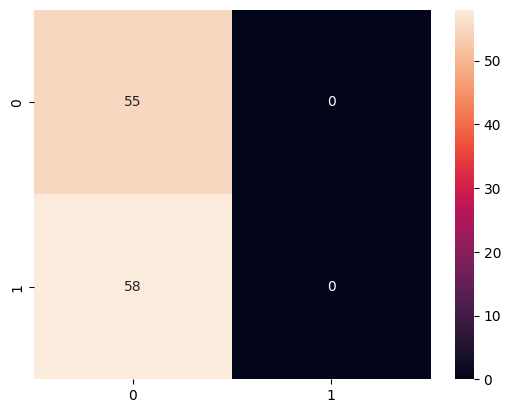

In [4]:
#plot confusion matrix, accuracy, and loss
Y_pred = model.predict(X_test)
Y_pred = np.argmax(Y_pred, axis=1)

cm = confusion_matrix(Y_test, Y_pred)
print(cm)
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

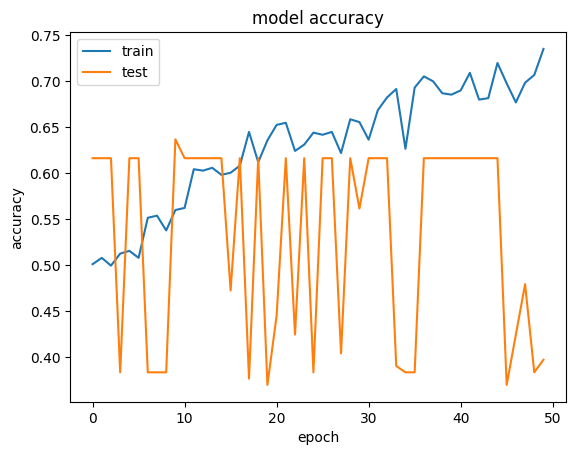

In [5]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

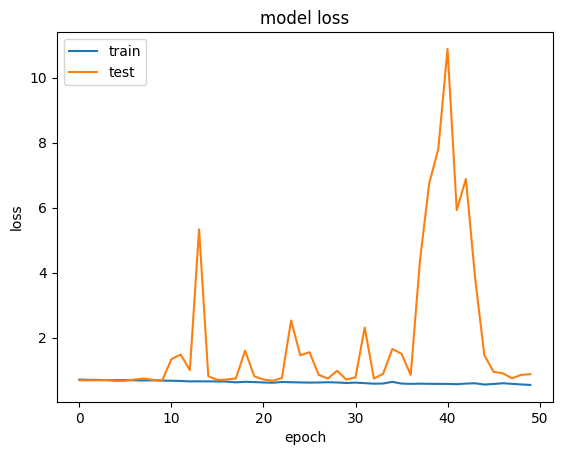

In [6]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()